In [34]:
import os
import sys
import glob
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm # progress bars :)
tqdm.pandas()

sns.set_context("paper")

In [35]:
pd.__version__

'0.24.2'

# Import Simulated Data with MRCC Values

In [36]:
%%bash
mkdir -p ../data
curl -L https://osf.io/fksug/download -o ../data/simreads-compare.dnainput.processed.mrcc-onestep.csv.gz
ls ../data

simreads-compare.dnainput.csv.gz
simreads-compare.dnainput.processed.csv.gz
simreads-compare.dnainput.processed.mashD.csv.gz
simreads-compare.dnainput.processed.mrcc-onestep.csv.gz
simreads-compare.dnainput.processed.mrcc-twostep.csv.gz
simreads-compare.dnainput.processed.mrcc.csv.gz


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   459  100   459    0     0   1192      0 --:--:-- --:--:-- --:--:--  1192
100 13.8M  100 13.8M    0     0  7034k      0  0:00:02  0:00:02 --:--:-- 19.9M


In [37]:
sDF = pd.read_csv("../data/simreads-compare.dnainput.processed.mrcc-onestep.csv.gz")
sDF.head()

,comparison_name,sig1_name,sig2_name,alphabet,ksize,scaled,jaccard,max_containment,sig1_containment,sig2_containment,sig1_hashes,sig2_hashes,num_common,alpha-ksize,num_unique_kmers,true p-distance,mc_pLow,mc_pHigh,mc_pMid,mc_pEst
0,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,1,0.192024,0.329152,0.329152,0.315500,4974666,5189923,1637423,dna-21,5082294.5,0.047855,0.051308,0.051773,0.051540,0.051540
1,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,100,0.193861,0.332344,0.332344,0.317521,49849,52176,16567,dna-21,5082294.5,0.047855,0.050506,0.051706,0.051106,0.051104
2,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,1000,0.203267,0.343331,0.343331,0.332559,5001,5163,1717,dna-21,5082294.5,0.047855,0.047915,0.051384,0.049649,0.049634
3,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,2000,0.203029,0.344026,0.344026,0.331274,2494,2590,858,dna-21,5082294.5,0.047855,0.047135,0.052012,0.049573,0.049542
4,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,31,1,0.108379,0.199794,0.199794,0.191507,4974660,5189923,993907,dna-31,5082291.5,0.047855,0.050369,0.050880,0.050624,0.050624


In [38]:
sDF.shape

(273600, 20)

In [39]:
# let's make a column for the difference between the point estimate and the mc_pdist
sDF["pdist_diff"] = sDF["true p-distance"] - sDF["mc_pEst"]
sDF.head()

,comparison_name,sig1_name,sig2_name,alphabet,ksize,scaled,jaccard,max_containment,sig1_containment,sig2_containment,...,sig2_hashes,num_common,alpha-ksize,num_unique_kmers,true p-distance,mc_pLow,mc_pHigh,mc_pMid,mc_pEst,pdist_diff
0,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,1,0.192024,0.329152,0.329152,0.315500,...,5189923,1637423,dna-21,5082294.5,0.047855,0.051308,0.051773,0.051540,0.051540,-0.003686
1,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,100,0.193861,0.332344,0.332344,0.317521,...,52176,16567,dna-21,5082294.5,0.047855,0.050506,0.051706,0.051106,0.051104,-0.003250
2,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,1000,0.203267,0.343331,0.343331,0.332559,...,5163,1717,dna-21,5082294.5,0.047855,0.047915,0.051384,0.049649,0.049634,-0.001779
3,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,2000,0.203029,0.344026,0.344026,0.331274,...,2590,858,dna-21,5082294.5,0.047855,0.047135,0.052012,0.049573,0.049542,-0.001688
4,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,31,1,0.108379,0.199794,0.199794,0.191507,...,5189923,993907,dna-31,5082291.5,0.047855,0.050369,0.050880,0.050624,0.050624,-0.002770


In [40]:
# let's get the simulation info from the comparison name

sDF["nt-freq"] = sDF["comparison_name"].str.extract(r"-(f\d)-")
sDF["model"] = sDF["comparison_name"].str.extract(r"-f\d-(\w*)-")
sDF.head()

,comparison_name,sig1_name,sig2_name,alphabet,ksize,scaled,jaccard,max_containment,sig1_containment,sig2_containment,...,alpha-ksize,num_unique_kmers,true p-distance,mc_pLow,mc_pHigh,mc_pMid,mc_pEst,pdist_diff,nt-freq,model
0,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,1,0.192024,0.329152,0.329152,0.315500,...,dna-21,5082294.5,0.047855,0.051308,0.051773,0.051540,0.051540,-0.003686,f1,nogam
1,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,100,0.193861,0.332344,0.332344,0.317521,...,dna-21,5082294.5,0.047855,0.050506,0.051706,0.051106,0.051104,-0.003250,f1,nogam
2,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,1000,0.203267,0.343331,0.343331,0.332559,...,dna-21,5082294.5,0.047855,0.047915,0.051384,0.049649,0.049634,-0.001779,f1,nogam
3,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,2000,0.203029,0.344026,0.344026,0.331274,...,dna-21,5082294.5,0.047855,0.047135,0.052012,0.049573,0.049542,-0.001688,f1,nogam
4,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,31,1,0.108379,0.199794,0.199794,0.191507,...,dna-31,5082291.5,0.047855,0.050369,0.050880,0.050624,0.050624,-0.002770,f1,nogam


In [41]:
# there are some comparisons with no k-mers/hashes in common -- let's eliminate these
sDF = sDF[sDF["num_common"] != 0]
sDF.shape

(155143, 23)

In [42]:
# let's just work with scaled=1 to start:
s1DF = sDF[sDF["scaled"] == 1]

# build other scaled df's:
s100DF = sDF[sDF["scaled"] == 100]
s1000DF = sDF[sDF["scaled"] == 1000]
s2000DF = sDF[sDF["scaled"] == 2000]

Text(0.5, 1.1, 'Explore p-distance estimates by model and nucl freq (scaled=1)')

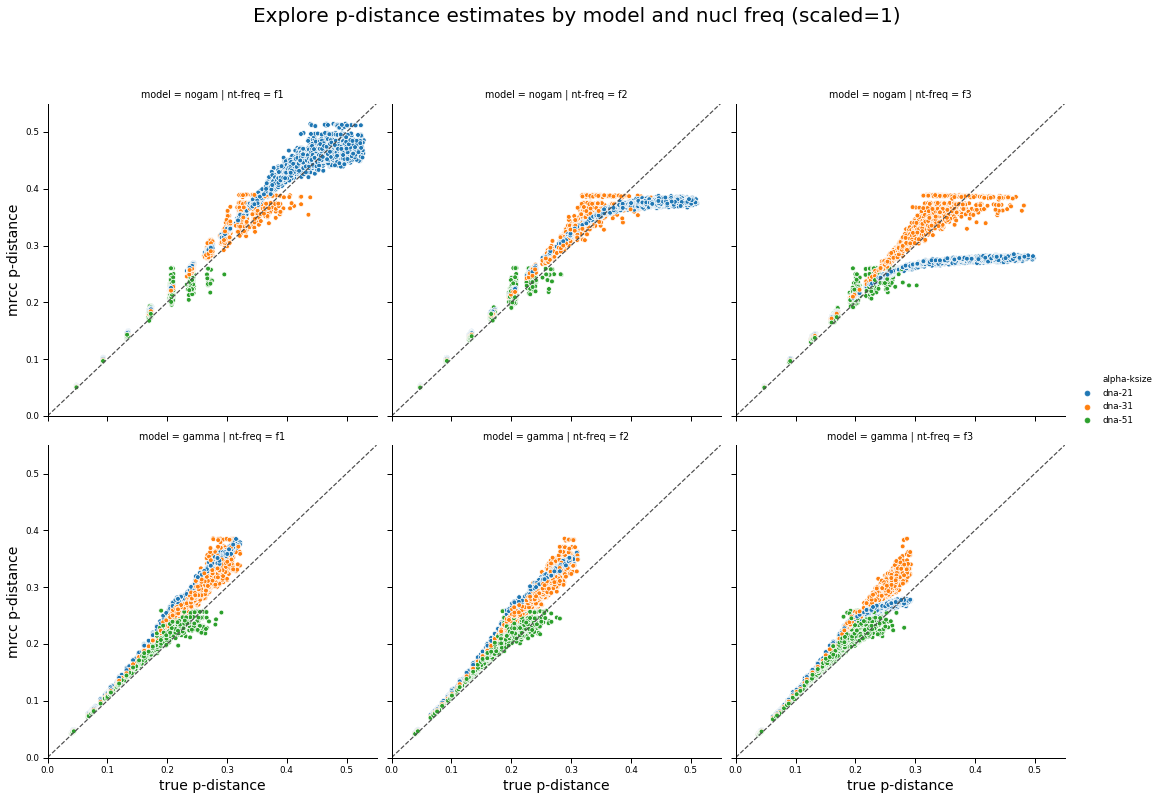

In [43]:
data_to_plot = s1DF # select dataframe to plot with

g = sns.relplot(data=data_to_plot, x="true p-distance", y="mc_pEst", col="nt-freq", row="model", hue="alpha-ksize")#, palette="GnBu_d")
g.set(xlim=(0, 0.55), ylim=(0, 0.55), xticks=np.arange(0, 0.60, 0.1), yticks=np.arange(0, 0.60, 0.1))
xlim=None
for ax in g.fig.axes:
    if not xlim:
        xlim =ax.get_xlim()
        ylim = ax.get_ylim()
    ax.plot(xlim, ylim, ls="--", c=".3")
    ax.set_xlabel("true p-distance", size=14)
    ax.set_ylabel("mrcc p-distance", size=14)
g.fig.suptitle("Explore p-distance estimates by model and nucl freq (scaled=1)", x=0.5, y=1.10, size=20)

Text(0.5, 1.1, 'Explore p-distance estimates by model and nucl freq (scaled=1)')

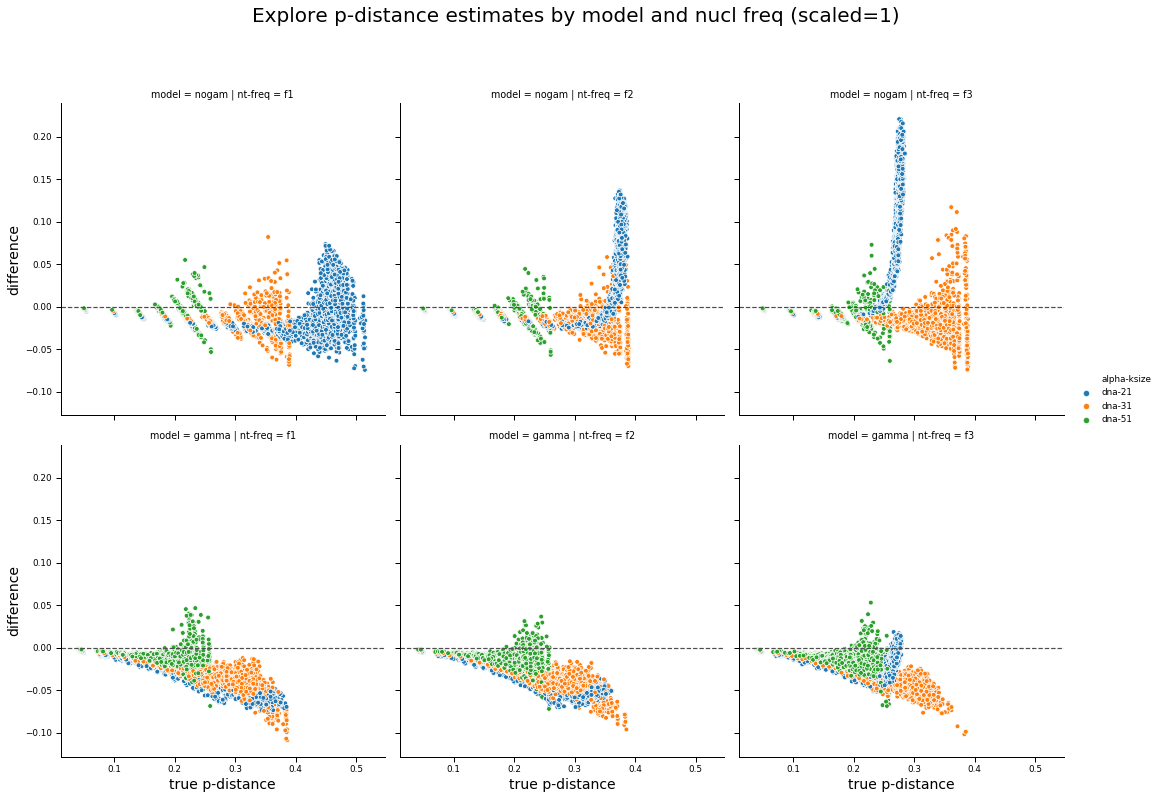

In [44]:
data_to_plot = s1DF # select dataframe to plot with
d = sns.relplot(data=data_to_plot, x="mc_pEst", y="pdist_diff", col="nt-freq", row="model", hue="alpha-ksize")
for ax in d.fig.axes:
    ax.axhline(0, ls="--", c=".3")
    ax.set_xlabel("true p-distance", size=14)
    ax.set_ylabel("difference", size=14)
d.fig.suptitle("Explore p-distance estimates by model and nucl freq (scaled=1)", x=0.5, y=1.10, size=20)

Text(0.5, 1.1, 'Explore p-distance estimates by model and nucl freq (scaled=1000)')

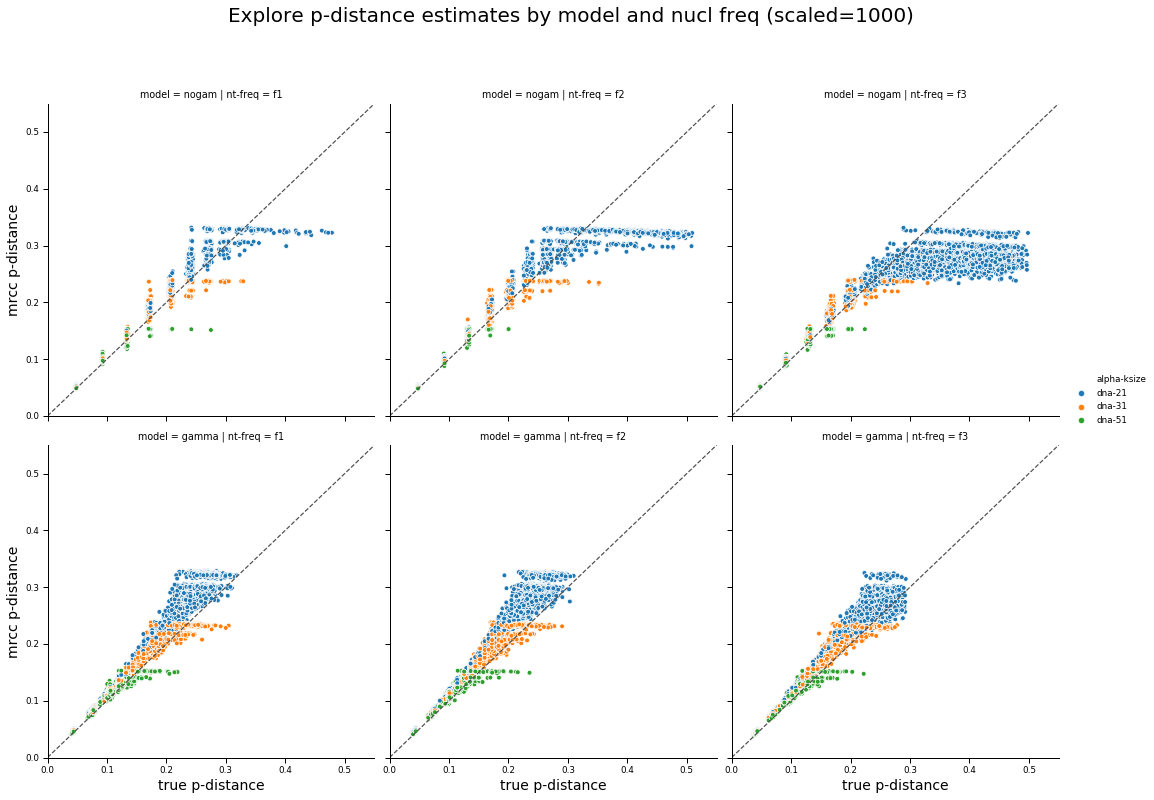

In [46]:
data_to_plot = s1000DF # select dataframe to plot with

g = sns.relplot(data=data_to_plot, x="true p-distance", y="mc_pEst", col="nt-freq", row="model", hue="alpha-ksize")#, palette="GnBu_d")
g.set(xlim=(0, 0.55), ylim=(0, 0.55), xticks=np.arange(0, 0.60, 0.1), yticks=np.arange(0, 0.60, 0.1))
xlim=None
for ax in g.fig.axes:
    if not xlim:
        xlim =ax.get_xlim()
        ylim = ax.get_ylim()
    ax.plot(xlim, ylim, ls="--", c=".3")
    ax.set_xlabel("true p-distance", size=14)
    ax.set_ylabel("mrcc p-distance", size=14)
g.fig.suptitle("Explore p-distance estimates by model and nucl freq (scaled=1000)", x=0.5, y=1.10, size=20)

Text(0.5, 1.1, 'Explore p-distance estimates by model and nucl freq (scaled=1000)')

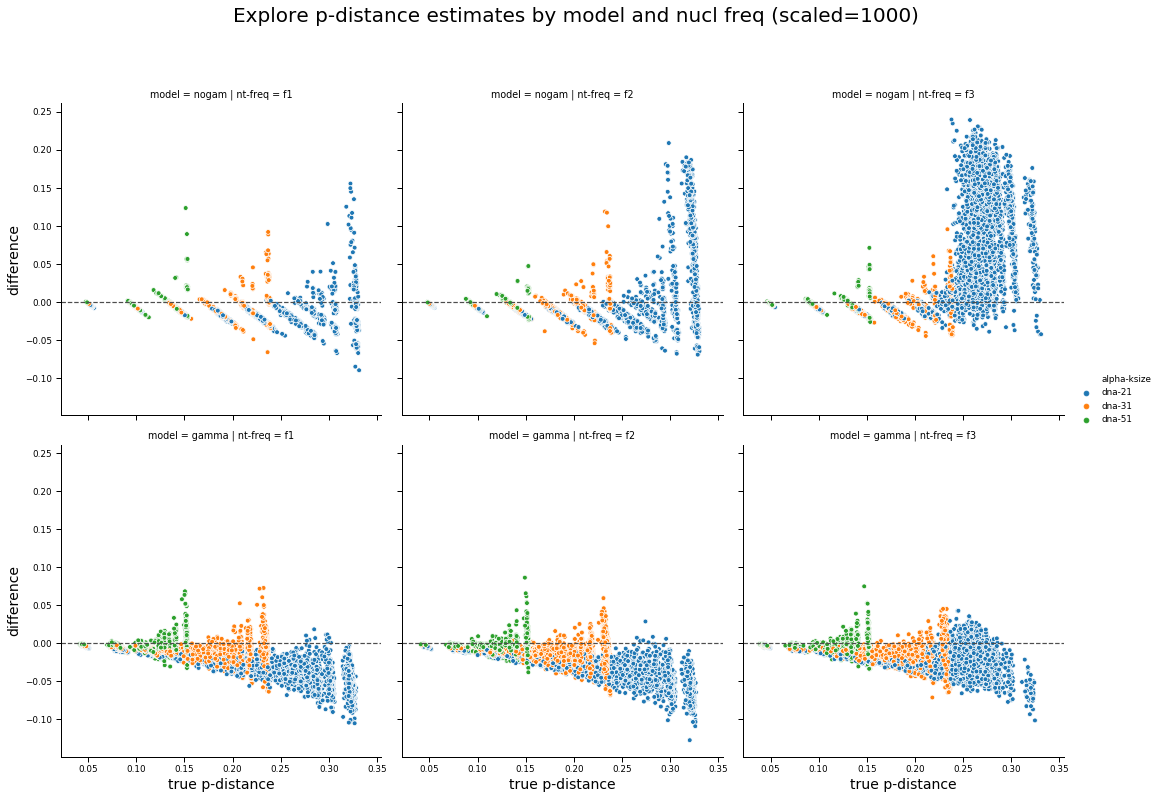

In [47]:
 data_to_plot = s1000DF # select dataframe to plot with
d = sns.relplot(data=data_to_plot, x="mc_pEst", y="pdist_diff", col="nt-freq", row="model", hue="alpha-ksize")
for ax in d.fig.axes:
    ax.axhline(0, ls="--", c=".3")
    ax.set_xlabel("true p-distance", size=14)
    ax.set_ylabel("difference", size=14)
d.fig.suptitle("Explore p-distance estimates by model and nucl freq (scaled=1000)", x=0.5, y=1.10, size=20)

# Check for true p-value w/in mc_pLow and mc_pHigh

In [48]:
def p_in_ci(row):
    true_p = float(row["true p-distance"])
    low = float(row["mc_pLow"])
    high = float(row["mc_pHigh"])
    if true_p >= low and true_p <= high:
        return True
    else:
        return False

In [49]:
sDF["p_in_mrcc_ci"] = sDF.progress_apply(p_in_ci, axis=1)

100%|██████████| 155143/155143 [00:06<00:00, 24223.36it/s]


In [50]:
sDF.head()

,comparison_name,sig1_name,sig2_name,alphabet,ksize,scaled,jaccard,max_containment,sig1_containment,sig2_containment,...,num_unique_kmers,true p-distance,mc_pLow,mc_pHigh,mc_pMid,mc_pEst,pdist_diff,nt-freq,model,p_in_mrcc_ci
0,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,1,0.192024,0.329152,0.329152,0.315500,...,5082294.5,0.047855,0.051308,0.051773,0.051540,0.051540,-0.003686,f1,nogam,False
1,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,100,0.193861,0.332344,0.332344,0.317521,...,5082294.5,0.047855,0.050506,0.051706,0.051106,0.051104,-0.003250,f1,nogam,False
2,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,1000,0.203267,0.343331,0.343331,0.332559,...,5082294.5,0.047855,0.047915,0.051384,0.049649,0.049634,-0.001779,f1,nogam,False
3,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,2000,0.203029,0.344026,0.344026,0.331274,...,5082294.5,0.047855,0.047135,0.052012,0.049573,0.049542,-0.001688,f1,nogam,True
4,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,31,1,0.108379,0.199794,0.199794,0.191507,...,5082291.5,0.047855,0.050369,0.050880,0.050624,0.050624,-0.002770,f1,nogam,False


In [51]:
sDF_inCI = sDF[sDF["p_in_mrcc_ci"] ==True]
sDF_inCI.head()

,comparison_name,sig1_name,sig2_name,alphabet,ksize,scaled,jaccard,max_containment,sig1_containment,sig2_containment,...,num_unique_kmers,true p-distance,mc_pLow,mc_pHigh,mc_pMid,mc_pEst,pdist_diff,nt-freq,model,p_in_mrcc_ci
3,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,2000,0.203029,0.344026,0.344026,0.331274,...,5082294.5,0.047855,0.047135,0.052012,0.049573,0.049542,-0.001688,f1,nogam,True
7,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,31,2000,0.112645,0.208488,0.208488,0.196811,...,5082291.5,0.047855,0.047005,0.051674,0.049339,0.049319,-0.001464,f1,nogam,True
11,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,51,2000,0.037630,0.073237,0.073237,0.071838,...,5082271.5,0.047855,0.047382,0.052567,0.049975,0.049964,-0.002110,f1,nogam,True
19,data-d0.05-f1-nogam-seed44,data-d0.05-f1-nogam-seed44-seq1,data-d0.05-f1-nogam-seed44-seq2,dna,31,2000,0.112679,0.205458,0.199697,0.205458,...,4969613.5,0.048017,0.047407,0.052170,0.049788,0.049768,-0.001751,f1,nogam,True
22,data-d0.05-f1-nogam-seed44,data-d0.05-f1-nogam-seed44-seq1,data-d0.05-f1-nogam-seed44-seq2,dna,51,1000,0.039189,0.075536,0.075536,0.075310,...,4969593.5,0.048017,0.047555,0.051233,0.049394,0.049389,-0.001372,f1,nogam,True


In [52]:
sDF_inCI.shape

(38671, 24)

In [53]:
(42212, 23)
# how many true values per scaled?
#sDF_inCI.groupby("scaled").describe()
sDF_inCI.groupby(["scaled", "ksize"])[["true p-distance"]].describe()


true p-distance                                          \
                       count      mean       std       min       25%   
scaled ksize                                                           
1      21             1269.0  0.430030  0.066304  0.232130  0.407982   
       31             1432.0  0.335199  0.027700  0.258184  0.318437   
       51             2787.0  0.210061  0.019981  0.156365  0.199564   
100    21             1974.0  0.333888  0.056811  0.200394  0.277712   
       31             2543.0  0.253757  0.022707  0.166496  0.240140   
       51             2564.0  0.162154  0.021248  0.090641  0.146495   
1000   21             4212.0  0.261866  0.039115  0.042778  0.239052   
       31             4289.0  0.190558  0.037975  0.041169  0.170749   
       51             3274.0  0.112591  0.032784  0.037604  0.092121   
2000   21             5782.0  0.238438  0.049348  0.039471  0.218070   
       31             5063.0  0.162750  0.047457  0.039407  0.133762   
       51             3482.0  0.097587  0.033789  0.037604  0.074841   

                                            
                   50%       75%       max  
scaled ksize                                
1      21     0.451179  0.476208  0.525072  
       31     0.330782  0.350621  0.433619  
       51     0.207625  0.221936  0.290729  
100    21     0.344654  0.375324  0.442243  
       31     0.252881  0.267322  0.329153  
       51     0.165699  0.173132  0.214194  
1000   21     0.261609  0.281531  0.375713  
       31     0.196767  0.212523  0.277571  
       51     0.121186  0.133683  0.179171  
2000   21     0.242075  0.265509  0.359003  
       31     0.170776  0.197554  0.262235  
       51     0.097907  0.128744  0.170252

In [ ]:
# totals (non-zero jaccard/containment values)
sDF.groupby(["scaled", "ksize"])[["true p-distance"]].describe()